In [14]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import requests

In [2]:
# Load the data
df = pd.read_csv("HPCL_books_data.csv")

In [3]:
df['first_publish_year'].dtype

dtype('float64')

(array([8.17395172e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

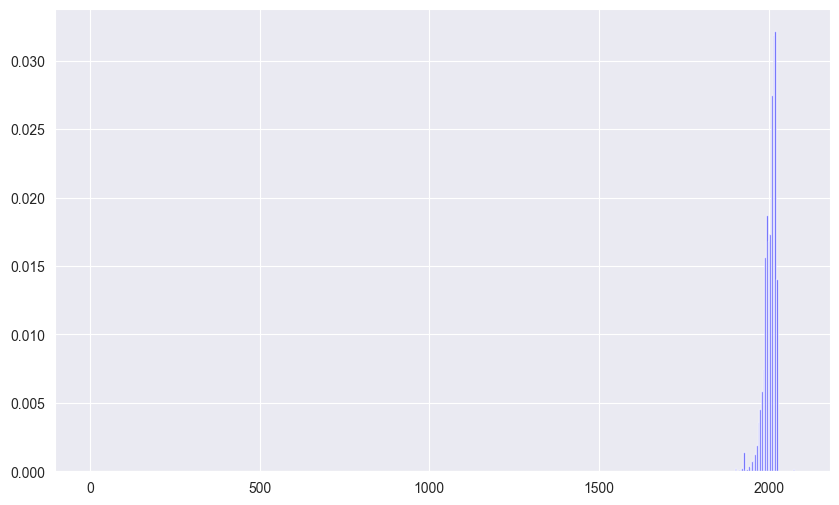

In [5]:
df = df[df['first_publish_year'].notna()]
plt.figure(figsize=(10, 6))
plt.hist(df['first_publish_year'], bins=424, color='blue', alpha=0.7,density=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124993 entries, 0 to 125972
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   title                    124993 non-null  object 
 1   ddc_sort                 29300 non-null   object 
 2   ratings_average          8499 non-null    float64
 3   ebook_count_i            124993 non-null  int64  
 4   edition_count            124993 non-null  int64  
 5   key                      124993 non-null  object 
 6   publisher                124993 non-null  object 
 7   publish_year             124993 non-null  object 
 8   type                     124993 non-null  object 
 9   isbn                     124504 non-null  object 
 10  author_name              120290 non-null  object 
 11  ratings_count_1          8499 non-null    float64
 12  ratings_count_2          8499 non-null    float64
 13  author_alternative_name  22543 non-null   object 
 14  seed     

In [8]:
df['publisher'].value_counts()

publisher
['HarperCollins Publishers']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                26941
['HarperCollins Publishers Limited']                                                                                                                        

In [9]:
df.head()

,title,ddc_sort,ratings_average,ebook_count_i,edition_count,key,publisher,publish_year,type,isbn,...,ebook_access,subject_key,ratings_count_3,language,title.1,ratings_count_5,ratings_count,first_publish_year,ddc,subject
0,Where ARe You Going Manyoni,NaN,NaN,0,1,/works/OL21725786W,['HarperCollins Publishers'],[2075],work,"['9780060507299', '0060507292']",...,no_ebook,"[""children's_fiction"", 'girls_fiction', 'zimba...",NaN,['eng'],Where ARe You Going Manyoni,NaN,NaN,2075.0,NaN,"['Girls, fiction', 'Zimbabwe, fiction', ""Child..."
1,Gentleman in the Purple Waistcoat,NaN,NaN,0,2,/works/OL25356109W,"['Smithsonian Books', 'HarperCollins Publishers']",[2075],work,"['9780061456565', '0061456551', '9780061456558...",...,no_ebook,NaN,NaN,['eng'],Gentleman in the Purple Waistcoat,NaN,NaN,2075.0,NaN,NaN
2,Mo's Mischief,NaN,NaN,0,1,/works/OL26529006W,['HarperCollins Publishers'],[2075],work,"['0061564788', '9780061564789']",...,no_ebook,"[""children's_fiction"", 'china_fiction', 'pets_...",NaN,['eng'],Mo's Mischief,NaN,NaN,2075.0,NaN,"[""Children's fiction"", 'Pets, fiction', 'China..."
3,My Car Lap Edition,NaN,NaN,0,1,/works/OL26556002W,['HarperCollins Publishers'],[2075],work,"['0062336932', '9780062336934']",...,no_ebook,NaN,NaN,['eng'],My Car Lap Edition,NaN,NaN,2075.0,NaN,NaN
4,My Bus Lap Edition,NaN,NaN,0,1,/works/OL26557056W,['HarperCollins Publishers'],[2075],work,"['0062336924', '9780062336927']",...,no_ebook,NaN,NaN,['eng'],My Bus Lap Edition,NaN,NaN,2075.0,NaN,NaN


In [12]:
df[df['publisher'] == "['HarperCollins Publishers']"]

,title,ddc_sort,ratings_average,ebook_count_i,edition_count,key,publisher,publish_year,type,isbn,...,ebook_access,subject_key,ratings_count_3,language,title.1,ratings_count_5,ratings_count,first_publish_year,ddc,subject
0,Where ARe You Going Manyoni,NaN,NaN,0,1,/works/OL21725786W,['HarperCollins Publishers'],[2075],work,"['9780060507299', '0060507292']",...,no_ebook,"[""children's_fiction"", 'girls_fiction', 'zimba...",NaN,['eng'],Where ARe You Going Manyoni,NaN,NaN,2075.0,NaN,"['Girls, fiction', 'Zimbabwe, fiction', ""Child..."
2,Mo's Mischief,NaN,NaN,0,1,/works/OL26529006W,['HarperCollins Publishers'],[2075],work,"['0061564788', '9780061564789']",...,no_ebook,"[""children's_fiction"", 'china_fiction', 'pets_...",NaN,['eng'],Mo's Mischief,NaN,NaN,2075.0,NaN,"[""Children's fiction"", 'Pets, fiction', 'China..."
3,My Car Lap Edition,NaN,NaN,0,1,/works/OL26556002W,['HarperCollins Publishers'],[2075],work,"['0062336932', '9780062336934']",...,no_ebook,NaN,NaN,['eng'],My Car Lap Edition,NaN,NaN,2075.0,NaN,NaN
4,My Bus Lap Edition,NaN,NaN,0,1,/works/OL26557056W,['HarperCollins Publishers'],[2075],work,"['0062336924', '9780062336927']",...,no_ebook,NaN,NaN,['eng'],My Bus Lap Edition,NaN,NaN,2075.0,NaN,NaN
5,Out Loud,NaN,NaN,0,2,/works/OL26594989W,['HarperCollins Publishers'],[2075],work,"['9780062995605', '006299560X', '0062995626', ...",...,no_ebook,NaN,NaN,['eng'],Out Loud,NaN,NaN,2075.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124496,The book of silence,823.914,NaN,1,1,/works/OL1911040W,['HarperCollins Publishers'],[1900],work,"['9780002239417', '0002239418']",...,public,"['duncton_wood_(imaginary_place)_fiction', 'fi...",NaN,['eng'],The book of silence,NaN,NaN,1900.0,['823.914'],"['Fiction, fantasy, general', 'Duncton wood (i..."
124835,The Seer of Shadows by Avi (2009-09-26),NaN,NaN,0,1,/works/OL34005965W,['HarperCollins Publishers'],[1772],work,NaN,...,no_ebook,NaN,NaN,NaN,The Seer of Shadows by Avi (2009-09-26),NaN,NaN,1772.0,NaN,NaN
124882,Advice For Italian Boys 1St edition by Giardin...,NaN,NaN,0,1,/works/OL34005346W,['HarperCollins Publishers'],[1707],work,NaN,...,no_ebook,NaN,NaN,NaN,Advice For Italian Boys 1St edition by Giardin...,NaN,NaN,1707.0,NaN,NaN
124895,Sankey's Sacred Songs and Solos (Hymns) by San...,NaN,NaN,0,1,/works/OL34541091W,['HarperCollins Publishers'],[1702],work,NaN,...,no_ebook,NaN,NaN,NaN,Sankey's Sacred Songs and Solos (Hymns) by San...,NaN,NaN,1702.0,NaN,NaN


In [31]:
openlib = requests.get("https://openlibrary.org/search.json?publisher=harpercollins&has_fulltext=false&publisher_facet=HarperCollins&limit=10000")

In [32]:
openlib

<Response [200]>

In [23]:
openlibdf.head()

,author_name,ebook_access,publish_date,publish_year,publisher,title
0,[C.S. Lewis],printdisabled,"[1997, October 25, 1990, June 1976, 2015, 2011...","[1950, 1959, 1965, 1968, 1969, 1970, 1972, 197...","[Brand: HarperCollins Publishers, Dramatic Pub...","The Lion, the Witch and the Wardrobe"
1,[J.R.R. Tolkien],printdisabled,"[2019, 1967, Sep 30, 2002, 2003?, Nov 02, 2021...","[1954, 1965, 1966, 1967, 1968, 1969, 1970, 197...","[Houghton Mifflin Harcourt, Klett-Cotta Verlag...",The Lord of the Rings
2,[Sylvia Plath],printdisabled,"[1972, 2020, 1993, 2014, 1971-01-01, 1972 Apri...","[1963, 1964, 1966, 1968, 1970, 1971, 1972, 197...","[G.K. Hall, Bantam, Editura POLIROM, Wagenbach...",The Bell Jar
3,"[Laura Ingalls Wilder, Garth Williams]",printdisabled,"[Apr 08, 2008, 2014, Aug 15, 1963, 1990, 2010,...","[1932, 1953, 1956, 1959, 1960, 1963, 1970, 197...","[Xiao shu wen hua you xian gong si, Marco Book...",Little House in the Big Woods
4,"[Laura Ingalls Wilder, Garth Williams]",printdisabled,"[June 1975, 1994, October 1999, 1990, 1989, Ma...","[1935, 1953, 1956, 1957, 1961, 1963, 1964, 196...","[Kŭl Sure, Harper, Scholastic Book Services, K...",Little House on the Prairie


In [27]:
openlibdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 92 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   author_alternative_name               84 non-null     object 
 1   author_key                            100 non-null    object 
 2   author_name                           100 non-null    object 
 3   contributor                           78 non-null     object 
 4   cover_edition_key                     88 non-null     object 
 5   cover_i                               100 non-null    int64  
 6   ddc                                   90 non-null     object 
 7   ebook_access                          100 non-null    object 
 8   ebook_count_i                         100 non-null    int64  
 9   edition_count                         100 non-null    int64  
 10  edition_key                           100 non-null    object 
 11  first_publish_year  